In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [11]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 89.4+ KB


# 2.Dummy Encoding the categorical and object values in the data

In [13]:
X = pd.get_dummies(df,columns=['gender'])
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,708746,916,103916,30-34,15,7350,1,1.43,2,1,0,1
1,708749,916,103917,30-34,16,17861,2,1.82,2,0,0,1
2,708771,916,103920,30-34,20,693,0,0.00,1,0,0,1
3,708815,916,103928,30-34,28,4259,1,1.25,1,0,0,1
4,708818,916,103928,30-34,28,4133,1,1.29,1,1,0,1


# 3. Correlation 

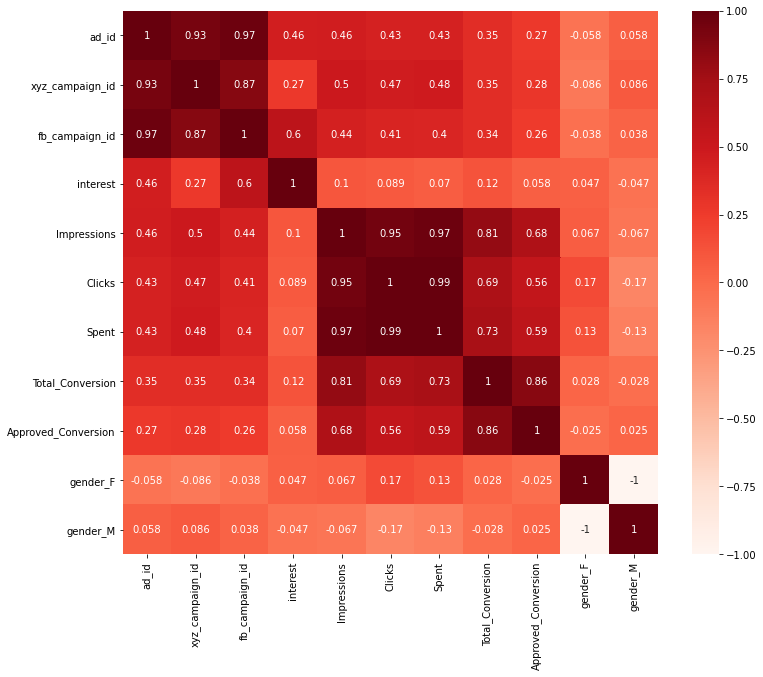

In [14]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
X=X.drop(['ad_id','xyz_campaign_id','fb_campaign_id','age'],axis=1)

In [16]:
X

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,15,7350,1,1.430000,2,1,0,1
1,16,17861,2,1.820000,2,0,0,1
2,20,693,0,0.000000,1,0,0,1
3,28,4259,1,1.250000,1,0,0,1
4,28,4133,1,1.290000,1,1,0,1
...,...,...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,2,1,0
1139,110,637549,120,173.880003,3,0,1,0
1140,111,151531,28,40.289999,2,0,1,0
1141,113,790253,135,198.710000,8,2,1,0


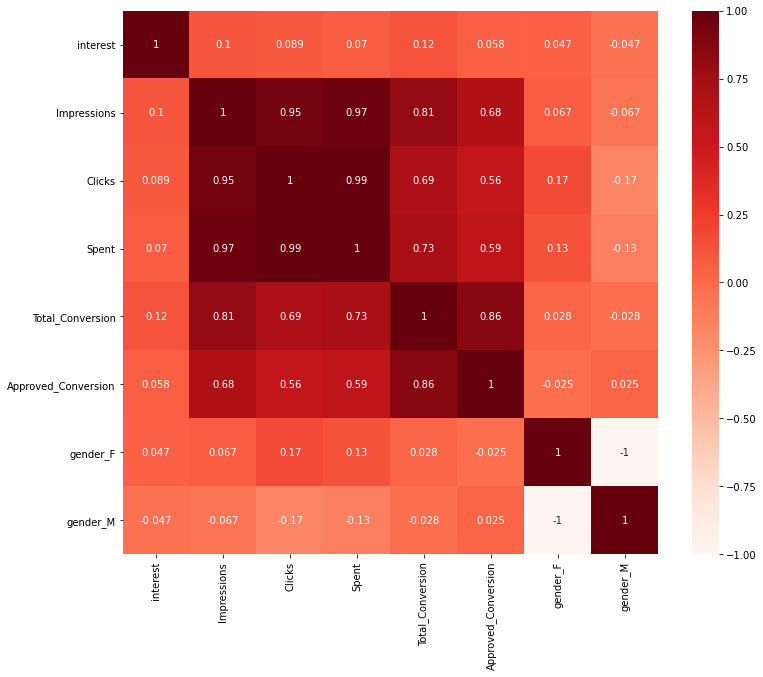

In [17]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The first four columns have a lower correlation to the target variable hence they are not of importance to the model


# 4. Clustering using the elbow method

In [18]:
x=df.copy()

In [19]:
x

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [20]:
x['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [21]:
x['age'] = x['age'].map({'30-34': 1, '35-39': 2, '40-44': 3, '45-49': 4})

In [22]:
x["gender"]=x["gender"].replace('M','0')
x["gender"]=x["gender"].replace('F','1')


In [23]:
x

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,1,0,15,7350,1,1.430000,2,1
1,708749,916,103917,1,0,16,17861,2,1.820000,2,0
2,708771,916,103920,1,0,20,693,0,0.000000,1,0
3,708815,916,103928,1,0,28,4259,1,1.250000,1,0
4,708818,916,103928,1,0,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,4,1,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,4,1,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,4,1,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,4,1,113,790253,135,198.710000,8,2


In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   int64  
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 93.8+ KB


In [25]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [26]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
 
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [27]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 298714.6520551094
2 : 221217.6904493844
3 : 117073.68305660126
4 : 96918.52102665097
5 : 89817.40612500468
6 : 79470.36839414545
7 : 65865.8180598479
8 : 55315.38645807954
9 : 50220.413172868866


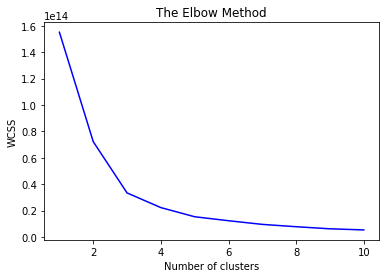

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, c = 'blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The value of k is at the elbow which is the point where the inertia starts decreasing at a linear fashion hence from the above data we can conclude that the number of clusters is 3

# 5. Using the elbow point to cluster values in data frame X

In [29]:
#k=3
km=KMeans(n_clusters=3)

In [30]:
xfeatures = X

In [31]:
clusters = km.fit_predict(xfeatures)

In [32]:
km.labels_

array([0, 0, 0, ..., 0, 2, 2])

In [33]:
clusters

array([0, 0, 0, ..., 0, 2, 2])

In [34]:
clusters is km.labels_

True

In [35]:
km.cluster_centers_

array([[3.10112867e+01, 5.43570609e+04, 9.55304740e+00, 1.45582393e+01,
        1.48645598e+00, 5.14672686e-01, 4.62753950e-01, 5.37246050e-01],
       [3.61884058e+01, 1.15268106e+06, 2.04217391e+02, 3.16745797e+02,
        1.41449275e+01, 4.65217391e+00, 5.94202899e-01, 4.05797101e-01],
       [3.97819149e+01, 4.56061059e+05, 8.30319149e+01, 1.27399840e+02,
        5.16489362e+00, 1.60638298e+00, 5.31914894e-01, 4.68085106e-01]])

In [36]:
X['cluster'] = clusters
X.head()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M,cluster
0,15,7350,1,1.43,2,1,0,1,0
1,16,17861,2,1.82,2,0,0,1,0
2,20,693,0,0.00,1,0,0,1,0
3,28,4259,1,1.25,1,0,0,1,0
4,28,4133,1,1.29,1,1,0,1,0


In [37]:
df_pred=X.copy()

K3= KMeans(3)
K3.fit(X)
df_pred['Predicted']=K3.fit_predict(X)

Text(0.5, 1.0, 'Clicks VS Conversion(K=3)')

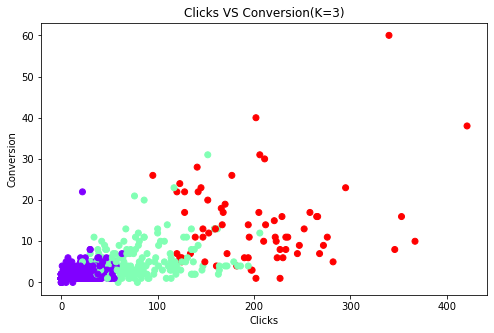

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(df_pred['Clicks'], df_pred['Total_Conversion'], c=df_pred['Predicted'], cmap = 'rainbow')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.title('Clicks VS Conversion(K=3)')

# 6 & 7 Using the model to predict the labels and adding the values to the original dataframe

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x)

In [40]:
print(y_means)

[0 0 0 ... 1 2 1]


In [41]:
df['Advert_Type'] = y_means
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,2
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,1
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,2


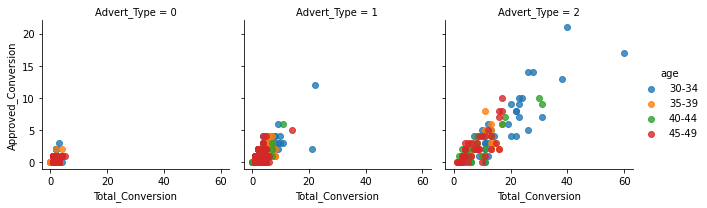

In [42]:
# Determining which advert type has highest and consistent amount of sales by customers of all age brackets
g = sns.FacetGrid(df, col="Advert_Type", hue="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.8)
g.add_legend();

Advert Type 2 has the highest number of sales and mostly popular with the 30-34 age group

<AxesSubplot:xlabel='gender', ylabel='Spent'>

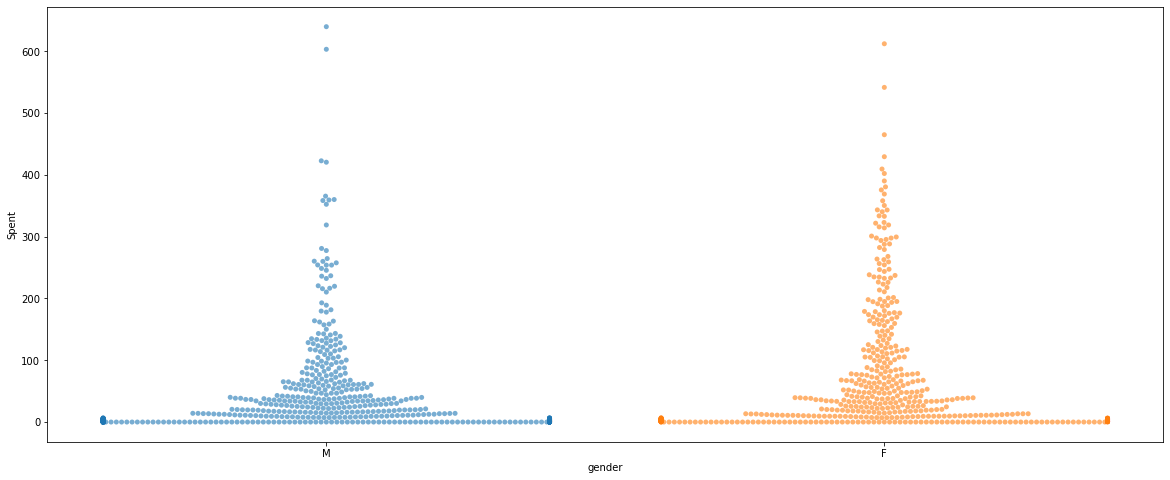

In [43]:
# Checking if Company XYZ has gender bias in terms of ad spendings
plt.figure(figsize=(20,8))
sns.swarmplot(x = 'gender' ,y='Spent', data=df, alpha = .6)

The company has a slight gender bias as they spent more on male ads than on female ads. Their ads are favourable to both genders but their spendings on ads is slightly biased towards men according to the swarmplot

# Hierarchical Clustering 

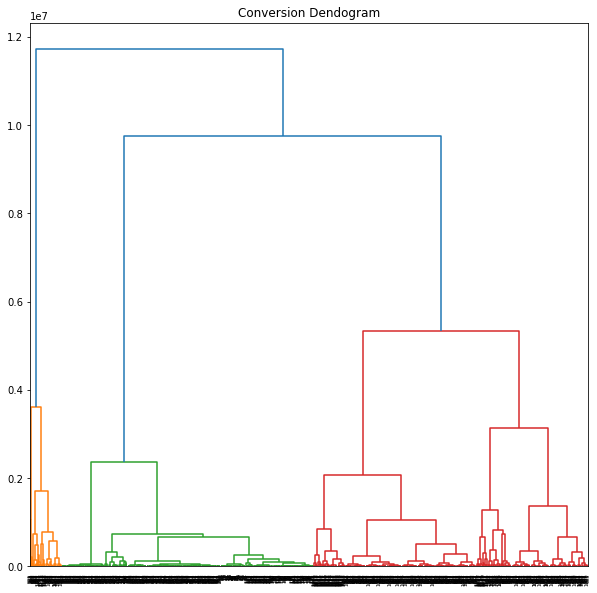

In [67]:
plt.figure ( figsize =((10,10)))
plt.title("Conversion Dendogram")
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))


In [70]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean", linkage='ward')
agg.fit_predict(x)

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [71]:
from sklearn import*
metrics.silhouette_score(x,y_means,metric='euclidean')

0.6420108037272931

It seems like 3 clusters work well for both analysis